# Программирование на Python 

*Алла Тамбовцева, НИУ ВШЭ*

## Практикум 8. Массивы NumPy и датафреймы Pandas

Почти все задачи снабжены тестами – ячейками со строками, содержащими конструкцию `assert`. Алгоритм работы с тестами такой: пишете код с решением, запускаете его, затем запускаете ячейку с тестами. Если после запуска ячейки с тестами ничего не произошло, ваш код с решением верный, если на экране появилось сообщение об ошибке, код неверный. 

Во всех заданиях необходимо называть объекты так, как указано в условии, иначе решение будет считаться ошибочным (например, для Python вообще и для `assert` в частности объекты `n` и `N` – не одно и то же).

## Часть 1: датафреймы из списков

Дан список списков `data`. На первом месте указывается имя героя на русском (`ru_name`), затем имя на английском (`en_name`), вид героя (`class`), индекс веселости, измеряется в «дейлах» (`cheer`).

In [1]:
data = [["Вжик", "Zipper the Fly", "fly", "0.7"],
["Гайка", "Gadget Hackwrench", "mouse", None],
["Дейл", "Dale", "chipmunk", "1"],
["Рокфор", "Monterey Jack", "mouse", "0.8"],
["Чип", "Chip", "chipmunk", "0.2"]] 

### Задание 1

На основе этого списка создайте датафрейм `df` так, чтобы каждому показателю (`ru_name`, `en_name`, `class`, `cheer`) соответствовал один столбец датафрейма. Проверьте, что последний столбец является числовым. Если нет, приведите его к типу *float*.

*В этом задании и далее добавлять текстовые названия столбцов нельзя, нужно обращаться к ним исключительно по индексу.*

In [2]:
import pandas as pd
df = pd.DataFrame(data)

In [3]:
# у последнего столбца тип object, не float

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
0    5 non-null object
1    5 non-null object
2    5 non-null object
3    4 non-null object
dtypes: object(4)
memory usage: 288.0+ bytes


In [4]:
# исправляем

df[3] = df[3].astype(float)

In [5]:
assert type(df) == pd.core.frame.DataFrame, "Объект df не является датафреймом"
assert df.shape == (5, 4), "Неверное число строк и столбцов"
assert df.dtypes.values[-1] == float, "Последний столбец не имеет тип float"

### Задание 2

Сохраните в переменную `N` число строк датафрейма `df`. Это должно быть одно число.

In [6]:
N = df.shape[0]

In [7]:
assert N == 5, "Неверный ответ"

### Задание 3

Сохраните в переменную `cn` число заполненных (не `NaN`) ячеек в последнем столбце.

In [8]:
cn = df[3].count()

In [9]:
assert cn == 4, "Неверный ответ"

### Задание 4

Сохраните в переменную `g` значение в ячейке, которая находится на пересечении третьей строки и второго столбца.

In [10]:
g = df.iloc[2, 1] 

In [11]:
# так как названия столбцов пока совпадают с их индексами, 
# разницы между использованием .iloc и .loc нет

g = df.loc[2, 1] 

In [12]:
assert g == 'Dale', "Неверный ответ"

### Задание 5

Сохраните в переменную `df1` строки датафрейма `df` со второй по четвертую включительно и столбцы с первого по третий включительно.

In [13]:
# а тут есть разница
# в .iloc правый конец среза исключается 
# (обычные числовые срезы)

df.iloc[1:4, 0:3]

,0,1,2
1,Гайка,Gadget Hackwrench,mouse
2,Дейл,Dale,chipmunk
3,Рокфор,Monterey Jack,mouse


In [14]:
# в .loc правый конец среза не исключается

df1 = df.loc[1:3, 0:2]

In [15]:
assert df1.shape == (3, 3), "Неверное число строк и столбцов"
assert df1[1].values[-2] == "Dale", "Выбраны не те строки или столбцы"

### Задание 6

Присвойте столбцам датафрейма `df` следующие названия: `ru_name`, `en_name`, `class`, `cheer`.

In [16]:
df.columns = ["ru_name", "en_name", "class", "cheer"] 

In [17]:
assert sum(df.T.index == ["ru_name", "en_name", "class", "cheer"]) == 4, "Неверно"

### Задание 7

Добавьте в датафрейм `df` столбец `logcheer`, который содержит логарифмированные значения `cheer` (если в `cheer` встречается `NaN`, то и в `logcheer` тоже).

In [18]:
# log() из math применяется только к одному числу,
# log() из numpy можно применять сразу к списку/массиву/последовательности

import numpy as np
df["logcheer"] = np.log(df["cheer"]) 

In [19]:
import math
assert math.isclose(df["logcheer"].values[-2], -0.22314, abs_tol = 1e-5),"Неверно"
assert math.isnan(df["logcheer"].values[-4]), "Неверно"

### Задание 8

Сохраните массив уникальных значений столбца `class` в переменную `x`, а соответствующие им частоты (сколько раз значение встречается в столбце) — в переменную `y`. Используя полученные `x` и `y`, постройте столбиковую диаграмму, *barplot*, для `class`. Добавьте заголовок и подписи к осям.

In [20]:
tab = df["class"].value_counts() 
tab

mouse       2
chipmunk    2
fly         1
Name: class, dtype: int64

In [21]:
x = tab.index
y = tab.values

In [23]:
from matplotlib import pyplot as plt

<BarContainer object of 3 artists>

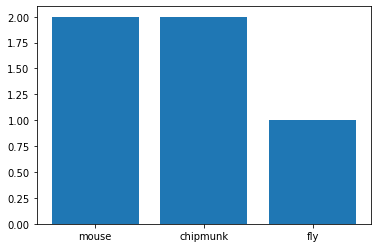

In [24]:
plt.bar(x, y)

### Задание 9

Дан список словарей `L` с результатами выгрузки 8 постов со стены сообщества НИУ ВШЭ в сети ВКонтакте (id поста, текст поста, информация по лайкам и просмотрам):

In [25]:
L = [{'id': 53050,
  'text': 'В рамках проекта «Социальный лифт» Вышка предоставляет льготы при поступлении абитуриентам, оказавшимся в сложных жизненных обстоятельствах и социально-экономических условиях. В 2019 году льготу получил 71 человек, а в этом году университет готов оказать поддержку уже 165 абитуриентам.\n\nМы поговорили с ребятами, поступившими по программе, и делимся их историями в новом видео.\n\nПодробнее об условиях участия, сроках и количестве мест можно прочитать по ссылке: r.hse.ru/lift',
  'likes': {'count': 56, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 14370}},
 {'id': 53163,
  'text': 'Даже в самом загруженном расписании стоит оставить немного места для заботы о себе. «Вышка для своих» делится мартовской подборкой мероприятий [club6222726|Центра психологического консультирования ВШЭ]: от хатха-йоги до групповых кинопросмотров',
  'likes': {'count': 6, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 2460}},
 {'id': 53161,
  'text': 'Начался прием заявок на соискание премии HSE Alumni Awards. 19 марта стартует открытое онлайн-голосование, которое определит шорт-листы по каждой номинации. Лауреатами премии могут стать выпускники всех кампусов Вышки.\n\nЗаявки принимаются до 15 марта на сайте премии: bit.ly/2TzuxXn',
  'likes': {'count': 4, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 2144}},
 {'id': 53159,
  'text': 'Вышка заняла первое место среди российских вузов по десяти предметам в рейтинге QS World University Rankings by Faculty & Subject 2020. Всего университет представлен в 19 предметных рейтингах, а по пяти из них входит в топ-100 глобального списка.\n\nВ этом году ВШЭ также присутствует в 4 из 5 отраслей QS, в том числе впервые в «Естественных науках»',
  'likes': {'count': 90, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 7136}},
 {'id': 53136,
  'text': 'Почему изучать космос сложно, но интересно, для чего нужно наблюдать за геокороной Земли и как вернуть престиж профессии учёного? Рассказывает преподаватель факультета физики ВШЭ Игорь Балюкин, победитель конкурса ИКИ РАН в номинации «Лучшая работа, выполненная молодыми учеными»',
  'likes': {'count': 15, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 4255}},
 {'id': 53133,
  'text': 'В феврале и начале марта сотрудники Вышки провели заключительный этап олимпиады [club154631231|«Я — профессионал»] по восьми направлениям. В соревнованиях приняли участие более 1600 студентов из 65 регионов и 212 вузов',
  'likes': {'count': 4, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 3266}},
 {'id': 53132,
  'text': 'В первый день весны на краешке Москвы прошёл зимний спортивный фестиваль [club35314658|HSE SNOW FEST], в котором приняли участие 460 человек. Горячий чай с блинами, квесты, соревнования по горным лыжам и сноуборду ждали студентов, преподавателей и выпускников Вышки',
  'likes': {'count': 76, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 6847}},
 {'id': 53130,
  'text': 'Команда [club24893373|МИЭФ] и сборная Вышки заняли первое и второе места на российском этапе «инвестиционной олимпиады» CFA Institute Research Challenge. В апреле студенты отправятся на европейский финал в Иорданию, а в случае успеха — в Нью-Йорк на глобальный финал конкурса',
  'likes': {'count': 23, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
  'views': {'count': 4376}}]

Создайте на его основе датафрейм `info`

In [26]:
info = pd.DataFrame(L)

In [27]:
assert info.shape == (8, 4), "Неверное число строк или столбцов"

### Задание 10 (2 балла)

1. Добавьте в датафрейм `info` столбец `nlikes`, содержащий число лайков (`count` из `likes`) без лишних фигурных скобок и прочей информации (например, для первой строки в `info` значение в столбце `nlikes` должно быть 56). 

2. Добавьте в датафрейм `info` столбец `nviews`, содержащий число просмотров (`count` из `nviews`) без лишних фигурных скобок и прочей информации (например, для первой строки в `info` значение в столбце `nviews` должно быть 14370). 

In [28]:
info["nlikes"] = info['likes'].apply(lambda x: x["count"])
info["nviews"] = info['views'].apply(lambda x: x["count"])

In [29]:
info

,id,text,likes,views,nlikes,nviews
0,53050,В рамках проекта «Социальный лифт» Вышка предо...,"{'count': 56, 'user_likes': 0, 'can_like': 1, ...",{'count': 14370},56,14370
1,53163,Даже в самом загруженном расписании стоит оста...,"{'count': 6, 'user_likes': 0, 'can_like': 1, '...",{'count': 2460},6,2460
2,53161,Начался прием заявок на соискание премии HSE A...,"{'count': 4, 'user_likes': 0, 'can_like': 1, '...",{'count': 2144},4,2144
3,53159,Вышка заняла первое место среди российских вуз...,"{'count': 90, 'user_likes': 0, 'can_like': 1, ...",{'count': 7136},90,7136
4,53136,"Почему изучать космос сложно, но интересно, дл...","{'count': 15, 'user_likes': 0, 'can_like': 1, ...",{'count': 4255},15,4255
5,53133,В феврале и начале марта сотрудники Вышки пров...,"{'count': 4, 'user_likes': 0, 'can_like': 1, '...",{'count': 3266},4,3266
6,53132,В первый день весны на краешке Москвы прошёл з...,"{'count': 76, 'user_likes': 0, 'can_like': 1, ...",{'count': 6847},76,6847
7,53130,Команда [club24893373|МИЭФ] и сборная Вышки за...,"{'count': 23, 'user_likes': 0, 'can_like': 1, ...",{'count': 4376},23,4376


In [30]:
assert info.loc[3, "nlikes"] == 90, "Неверное решение"
assert info.loc[6, "nlikes"] == 76, "Неверное решение"
assert info.loc[5, "nviews"] == 3266, "Неверное решение"
assert info.loc[2, "nviews"] == 2144, "Неверное решение"

## Часть 2: работа с файлом

**Файл для работы**

В файле `polit.csv` хранятся некоторые данные, используемые в [исследовании](http://jmcguire.faculty.wesleyan.edu/welcome/data/#20LActries) James W.McGuire, “Authoritarianism in the Middle East”.

**Показатели:**

* `ctry` – страна;
* `fh09` – индекс *Freedom House* за 2009 год (от 1 до 7, большие значения соответствуют меньшему уровню гражданских свобод);
* `polity09` – индекс *Polity2* за 2009 год (от -10 до 10, большие значения соответствуют большему уровню демократии);
* `gini` – индекс Джини за 2000-2010 годы (индекс имущественного неравенства);
* `fparl08` – доля женщин в парламенте в 2008 году (в процентах);
* `mena` – регион *Middle East and North Africa (1 – да, 0 – нет)*;
* `lati` – регион *Latin America*;
* `cari` – регион *Caribbean, former British, French, Dutch colony*;
* `east` – регион *East Asia*;
* `sovi` – регион *Former Soviet Bloc*;
* `afri` – регион *Africa*;
* `corr0509` – индекс *Control of Corruption*, среднее за 2005-2009 годы.

### Задание 1

Загрузите таблицу из файла `polit.csv`, используя *ссылку* на файл (это важно для тестов далее) и сохраните датафрейм в переменную `polit`. Если в датафрейме есть строки с пропущенными значениями, удалите их. Сохраните изменения в `polit`.

In [31]:
polit = pd.read_csv("polit.csv")
polit.dropna(inplace = True)

In [32]:
assert polit.shape == (135, 13), "Проверьте, сохранились ли изменения в polit"

### Задание 2

Выберите в датафрейме строки, которые соответствуют странам со значениями индекса *Freedom House* (`fh09`) выше 5. Сохраните их в датафрейм `not_free`.

In [33]:
not_free = polit[polit["fh09"] > 5] 

In [34]:
assert not_free.shape == (30, 13), "Неверное число строк или столбцов"
assert not_free.iloc[3, 9] == 0, "Неверный датафрейм"
assert not_free.iloc[19, 1] == 'Mauritania', "Неверный датафрейм"

### Задание 3

Выберите в датафрейме строки, которые соответствуют странам Африки (`afri`) с процентом женщин в парламенте (`fparl08`) выше 30%. Сохраните их в датафрейм `af_w`.

In [35]:
af_w = polit[(polit["afri"] == 1) & (polit["fparl08"] > 30)] 

In [36]:
assert af_w.shape == (6, 13), "Неверное число строк или столбцов"
assert af_w.iloc[3, 5] == 33.92, "Неверный датафрейм"
assert af_w.iloc[5, 7] == 0, "Неверный датафрейм"

### Задание 4

Выберите в датафрейме строки, которые соответствуют странам Африки или Латинской Америки (`afri` и `lati`) со значением индекса *Polity2* (`polity09`) больше или равным 8. Сохраните их в датафрейм `la_dem`.

In [37]:
# обратите внимание на скобки, порядок операций важен

la_dem = polit[((polit['afri'] == 1) | 
                (polit['lati'] == 1)) & (polit['polity09'] >= 8)]

In [38]:
assert la_dem.shape == (18, 13), "Неверное число строк или столбцов"
assert la_dem.iloc[3, 5] == 12.66, "Неверный датафрейм"
assert la_dem.iloc[5, 7] == 1, "Неверный датафрейм"

### Задание 5

Добавьте в датафрейм `polit` столбец `corr_round`, в котором будут храниться округленные до 2 знака после запятой значения индекса *Control of Corruption* (`corr0509`).

In [40]:
# та же история, что и с log()
# round() из numpy можно применять сразу 
# к последовательности значений

polit["corr_round"] = np.round(polit["corr0509"], 2)

In [41]:
assert round(polit["corr_round"].sum()) == -14.0, "Ошибка в столбце corr_round"
assert polit["corr_round"].max() == 2.38, "Ошибка в столбце corr_round"

### Задание 6 (2 балла)

Добавьте в датафрейм `polit` столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения *free*, *partly free*, *not free*). Соответствие значений `fh09` с типами стран см. [здесь](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) (*Table 3* на последней странице).

In [42]:
def get_status(x):
    if x >= 1.0 and x <= 2.5:
        r = "free"
    if x >= 3 and x <= 5:
        r = "partly free"
    if x >= 5.5 and x <= 7:
        r = "not free"
    return r

polit["fh_status"] = polit["fh09"].apply(get_status)

In [43]:
assert polit["fh_status"].value_counts().values[0] == 57, "Неверные значения в столбце"
assert polit["fh_status"].value_counts().values[1] == 48, "Неверные значения в столбце"
assert polit["fh_status"].value_counts().values[2] == 30, "Неверные значения в столбце"
assert polit["fh_status"].values[3] == 'free', "Неверные значения в столбце"
assert polit["fh_status"].values[4] == 'partly free', "Неверные значения в столбце"
assert polit["fh_status"].values[134] == 'not free', "Неверные значения в столбце"

### Задание 7

Сгруппируйте строки в таблице в соответствии со значениями столбца `fh_status`, полученного в предыдущей части и выведите минимальное, среднее и максимальное значение показателя `gini` (индекс Джини) по каждой группе.

In [45]:
polit.groupby("fh_status").agg(["min", "mean", "max"])["gini"]

,min,mean,max
fh_status,,,
free,24.7,38.170175,74.3
not free,16.8,39.750000,58.6
partly free,29.8,43.931250,64.3


### Задание 8

Сгруппируйте строки в таблице в соответствии со значениями столбца `fh_status` и запишите строки, относящиеся к разным группам, в отдельные csv-файлы.

In [46]:
for name, data in polit.groupby("fh_status"):
    data.to_csv(name + ".csv")